In [1]:
# Importing Packags
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read Dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#Splitting dataset to X train and y train
X_train = train.drop(labels = ["label"], axis = 1)
y_train = train['label']

X_test = test

print(X_train.shape,y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


In [4]:
# Reshapeing the dataset for plotting
number_plot = X_train.values.reshape(-1, 28, 28)

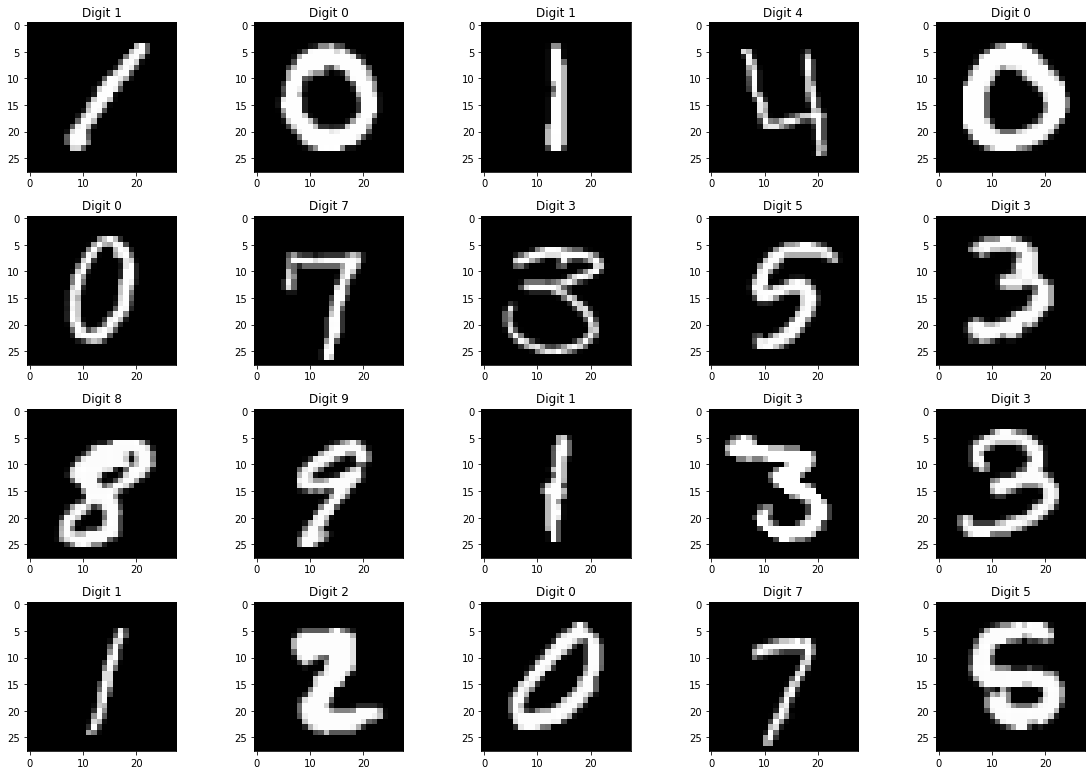

In [5]:
# Printing the Digit
mono = 'gray'
fig = plt.figure(figsize = (16, 16))
for i in range(20):
    plt.subplot(6, 5,i+1)
    plt.imshow(number_plot[i], cmap = mono)
    plt.title("Digit {}".format(y_train[i]))
plt.tight_layout()
plt.show()

3


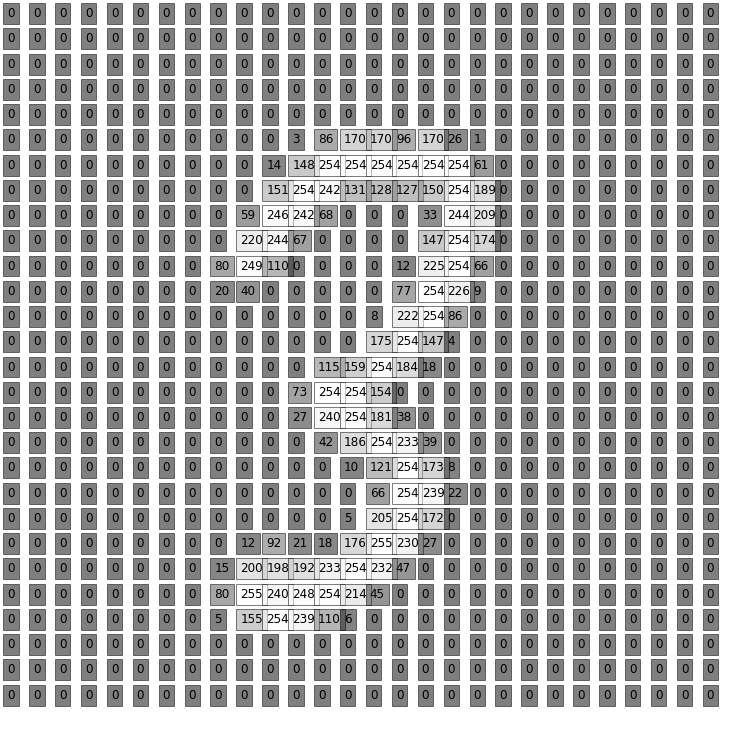

In [6]:
# Printing the random digit in grayscale
import random
rand_number = random.randint(0, len(y_train))
print(y_train[rand_number])
digit=number_plot[rand_number]
dim = 28 
font_size = 12
max_ax = font_size * dim
fig = plt.figure(figsize=(13, 13))
plt.xlim([0, max_ax])
plt.ylim([0, max_ax])
plt.axis('off')
black = '#000000'
for i in range(dim):
    for j in range(dim):
        t = plt.text(i * font_size, max_ax - j*font_size, digit[j][i], fontsize = font_size, color = black)
        c = digit[j][i] / 255.
        t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))

In [7]:
num_pixels = X_train.shape[1] 
input_shape = (28, 28)

In [8]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils.vis_utils import plot_model

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [9]:
# Data Normalization [0, 1]
X_train = X_train/255
X_test = X_test/255

# one-hot encoding for target column
y_train = to_categorical(y_train)

# | [0, 1, 2, ... , 9] | = 10
n_class = y_train.shape[1]

# Number of objects, vector size (28 * 28)
print(X_train.shape, X_test.shape)

(42000, 784) (28000, 784)


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size = 0.1, random_state = 2, stratify=y_train)

In [12]:
def callbacks(name): 
    return [ 
        EarlyStopping(monitor = 'loss', patience = 6), 
        ReduceLROnPlateau(monitor = 'loss', patience = 3), 
        ModelCheckpoint(f'../working/{name}.hdf5', save_best_only=True) # saving the best model
    ]

In [52]:
# Define The f1_score metrics 
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [96]:
# Defing the model
model1=Sequential()
model1.add(Dense(512, input_dim = num_pixels, activation='relu'))
model1.add(Dense(256, input_dim = num_pixels, activation='sigmoid'))
model1.add(Dense(n_class, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [95]:
epochs=40
history = model1.fit(X_train,y_train,batch_size = 1024,epochs=epochs,validation_data=(X_val, y_val),callbacks=[callbacks('simple_mlp')],verbose=1)

Epoch 1/40
37/37 [==============================] - 1s 23ms/step - loss: 0.0041 - accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9762 - val_f1: 0.9787
Epoch 2/40
37/37 [==============================] - 1s 22ms/step - loss: 0.0040 - accuracy: 0.9999 - f1: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9764 - val_f1: 0.9792
Epoch 3/40
37/37 [==============================] - 1s 22ms/step - loss: 0.0037 - accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9774 - val_f1: 0.9800
Epoch 4/40
37/37 [==============================] - 1s 22ms/step - loss: 0.0036 - accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9774 - val_f1: 0.9802
Epoch 5/40
37/37 [==============================] - 1s 25ms/step - loss: 0.0033 - accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9769 - val_f1: 0.9794
Epoch 6/40
37/37 [==============================] - 1s 28ms/step - loss: 0.0031 - accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.0785 - val_accuracy

In [79]:
from  matplotlib import pyplot as plt
import seaborn as sns

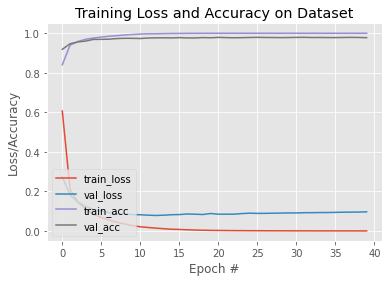

In [80]:
# Printing Loss And Accurcy
N = epochs # No. epochs 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

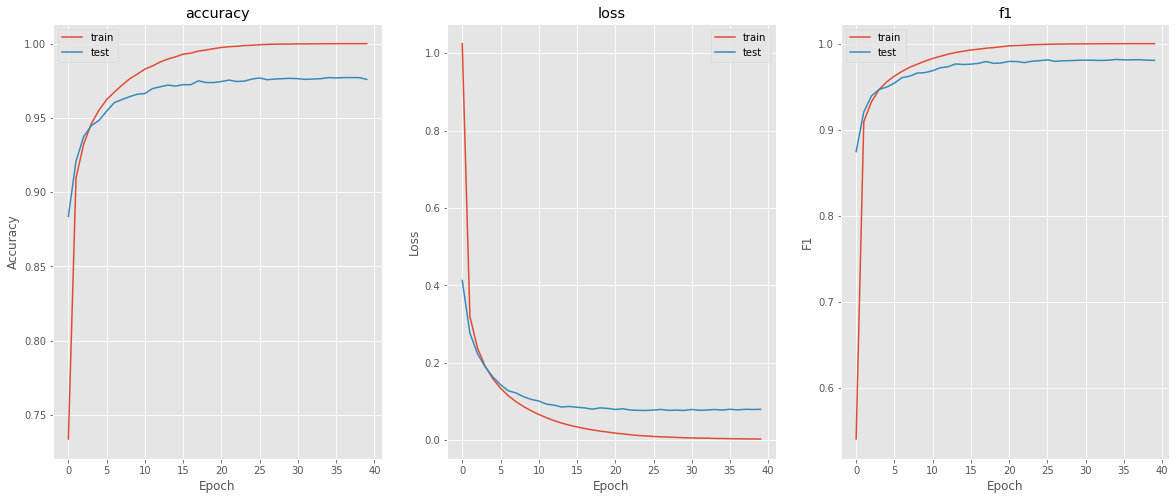

In [91]:
keys=['accuracy', 'loss','f1']
plt.figure(figsize=(20,8))
for i, key in enumerate(keys):
    plt.subplot(1, 3, i + 1)
    sns.lineplot(x = history.epoch, y = history.history[key])
    sns.lineplot(x = history.epoch, y = history.history['val_' + key])
    #plt.title('Learning Curve')
    plt.title("{}".format(keys[i]))
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
#         plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
plt.show()

In [82]:
model1.evaluate(X_val, y_val, verbose = 0)

[0.09694644063711166, 0.9776190519332886, 0.9776220321655273]

In [83]:
y_pred = model1.predict_classes(X_test)

C:\Users\mural\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [84]:
output = model1.predict(X_test)

output = np.argmax(output, axis = 1)

output = pd.Series(output, name="Label")

submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), output], axis = 1)

submission.to_csv("submission.csv", index=False)

In [85]:
number_plot = X_test.values.reshape(-1, 28, 28)

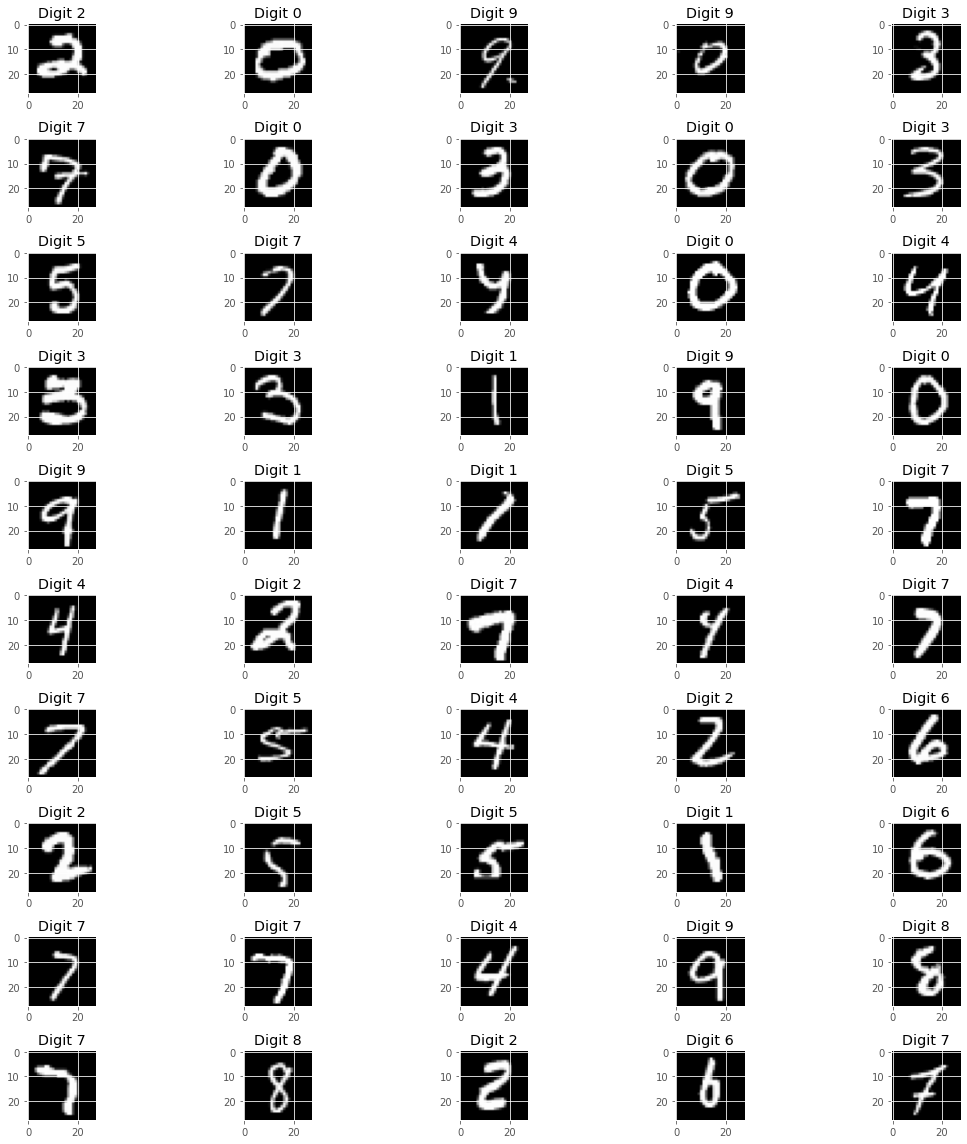

In [86]:
mono = 'gray'
fig = plt.figure(figsize = (16, 16))
for i in range(50):
    plt.subplot(10, 5,i+1)
    plt.imshow(number_plot[i], cmap = mono)
    plt.title("Digit {}".format(y_pred[i]))
plt.tight_layout()
plt.show()

In [94]:
print("Final test Accuracy:-",history.history['val_accuracy'][-1])
print("Final test Loss    :-",history.history['val_loss'][-1])
print("Final test F1 Score:-",history.history['val_f1'][-1])

Final test Accuracy:- 0.976190447807312
Final test Loss    :- 0.07563459128141403
Final test F1 Score:- 0.9791987538337708
